# Properties of polynomial interpolation

In this notebook we discuss briefly a set of properties of polynomial interpolation. 

In [9]:
import numpy
import matplotlib.pyplot as plt

## Erdos theorem

For any set of interpolation points there is a $k$ such that the following lower bound for $\Vert \Lambda^n \Vert_\infty$ holds:
$$\Vert \Lambda^n \Vert_\infty \geq \frac{2}{\pi} \log (n-1) - k$$
where $\Lambda^n(x) = \sum_i |\ell_i(x)|$ is called _Lebesgue patch_.

In [12]:
def lagrange(j, interpolation_points):
    return lambda x: np.product(
            [(x - interpolation_points[i]) / (interpolation_points[j] - interpolation_points[i]) 
                 for i in np.delete(np.array(range(len(interpolation_points))), j)], 
            axis=0)

def generate_basis(interpolation_points):
    return [lagrange(i, interpolation_points) for i in range(len(interpolation_points))]

See the notebook `polynomial-interpolation` for a visualization of Lagrange basis functions. We now define (and plot) a function to compute the _Lebesgue patch_, given a list of interpolation points:

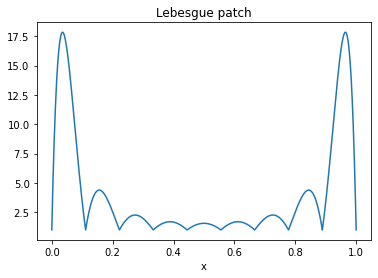

In [27]:
def lebesgue_patch(interp_points):
    def lp(x):
        return np.sum(np.array([np.abs(f(x)) for f in generate_basis(interp_points)]), axis=0)
    return lp

x = np.linspace(0,1,1000)
interp_points = np.linspace(0,1,10)
plt.plot(x,lebesgue_patch(interp_points)(x))
plt.title('Lebesgue patch')
plt.xlabel('x');

We now plot the behavior of $\Vert \Lambda^n \Vert$ as $n$ goes to infinity:

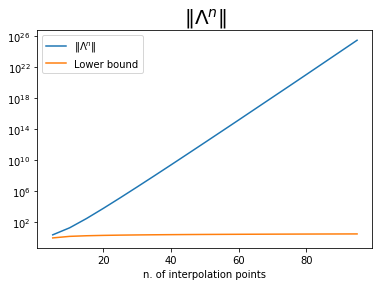

In [42]:
n = np.array(range(5,100,5))

plt.plot(n, [np.max(lebesgue_patch(np.linspace(0,1,ni))(x)) for ni in n], label='$\Vert \Lambda^n \Vert$')
plt.plot(n, 2/np.pi * np.log(n-1), label='Lower bound')
plt.yscale('log')
plt.xlabel('n. of interpolation points')
plt.legend()
plt.title('$\Vert \Lambda^n \Vert$', fontsize=20);

As you can see in the image above (y-axis is in logarithmic scale) the inequality presented above holds in this case.

## Runge example

We discuss an example featuring the function $f(x) = (1+x^2)^{-1}$, which does not have an analytical extension. As we are going to see, the interpolation does not converges in this case:

In [48]:
def runge(x):
    return np.divide(1,1+np.power(x,2))

We also gather the code we wrote in _polynomial-interpolation_, slightly simplified:

In [49]:
def V_matrix(interpolation_points, basis):
    return np.array([f(interpolation_points) for f in basis]).T

# interpolation entry-point
# l -> 'lagrange'
def interpolate(f, interpolation_points):
    basis = generate_basis(interpolation_points)
    
    V = V_matrix(interpolation_points, basis)
    p = np.linalg.solve(V, f(interpolation_points))
    
    return lambda x: np.inner(p, np.array([bf(x) for bf in basis]).T)

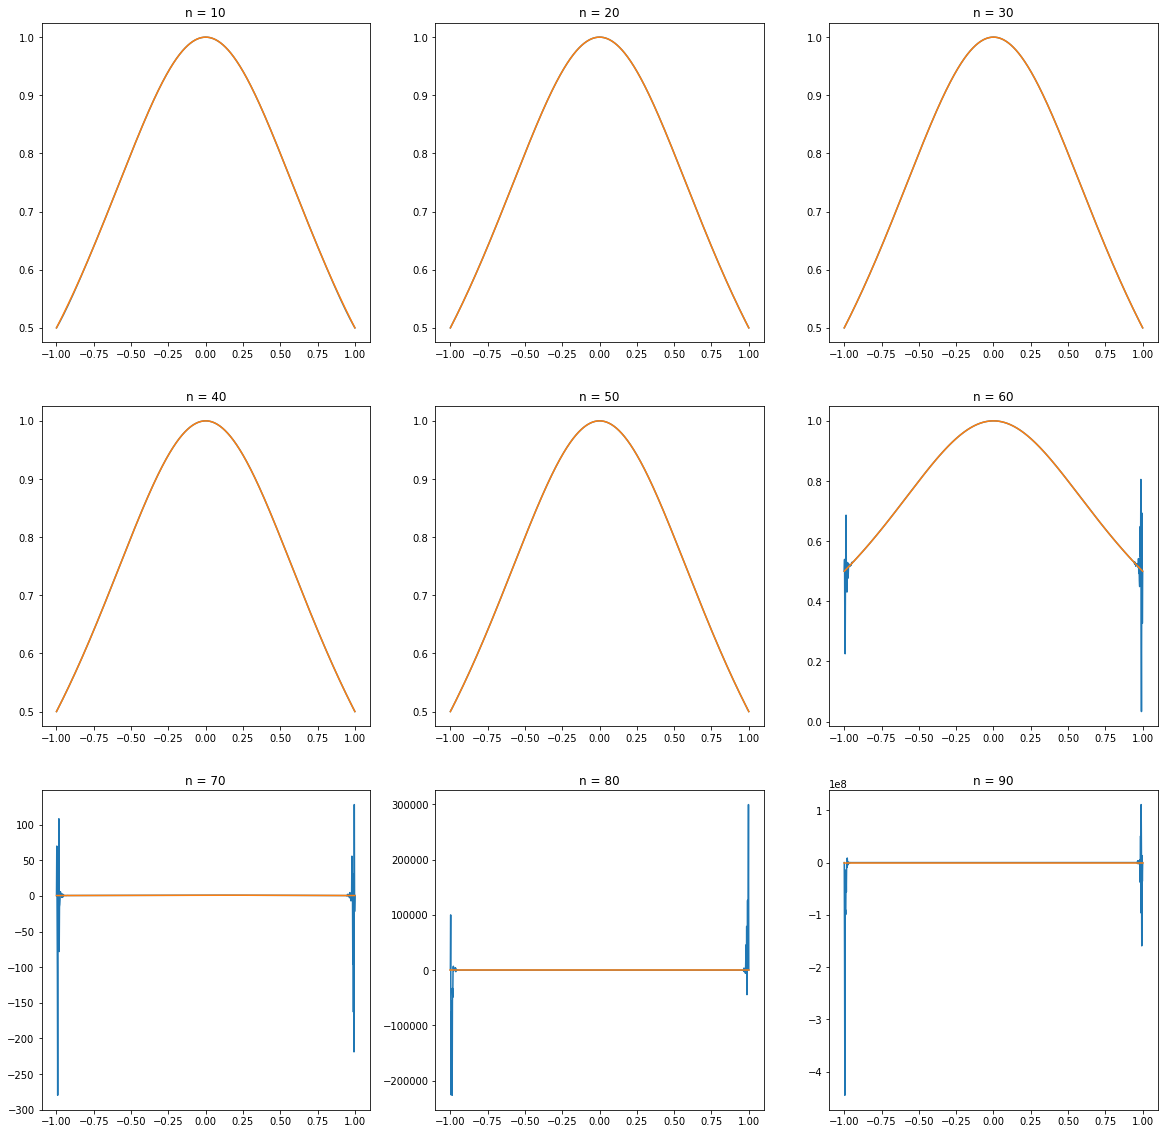

In [63]:
n = np.array(range(10,91,10))
x = np.linspace(-1,1,1000)

plt.figure(figsize=(20,20))

for idx,ni in enumerate(n):
    plt.subplot(3,3,idx+1)
    interp_points = np.linspace(-1,1,ni)
    
    itp = interpolate(runge, interp_points)(x)
    rg = runge(x)
    plt.plot(x, itp)
    plt.plot(x, rg)
    
    plt.title('n = {}'.format(ni))
plt.show()